# 7. Supplementary Figure 3

This notebook is used to create the panels of Supplementary Figure 3.

Before starting, use 1.Preprocessing notebook to generate:
- SC2_normalized.h5ad - Normalized single-cell data

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scanpy as sc
from scipy import stats
from anndata import read_h5ad

import sys
sys.path.insert(0, '../functions/')
import utils
import pl

### Set plot style

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats=['retina']
sns.set(rc={'figure.figsize':(5, 5),
            'legend.frameon':False},
        style='ticks',
        context='talk')

# Render figures with higher resolution.
plt.rcParams['figure.dpi']=200
# Save with transparent regions white background.
plt.rcParams['savefig.facecolor']='white'

### Set color palette

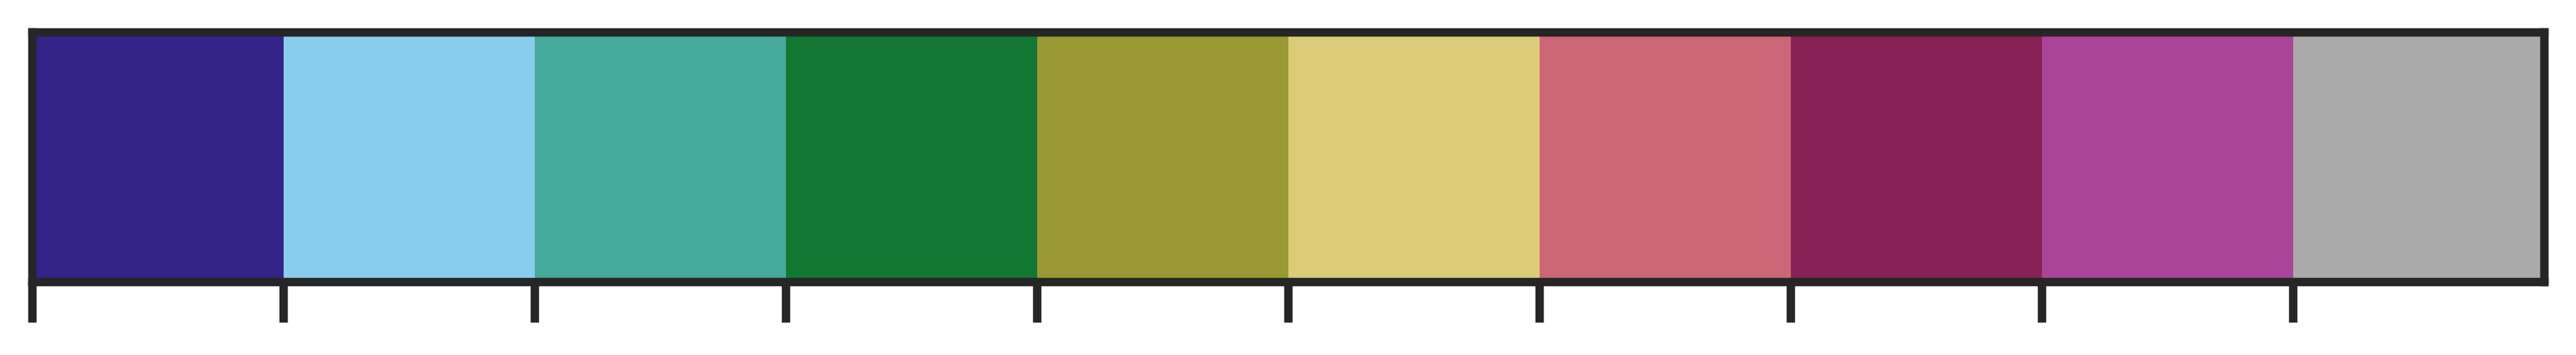

In [3]:
#color palette
palette = [(51,34,136),(136,204,238),(68,170,153),(17,119,51),(153,153,51),(221,204,119),(204,102,119),(136,34,85),(170,68,153),(170,170,170)]
palette = [(e[0]/255.0, e[1]/255.0, e[2]/255.0) for e in palette]
cmap = ListedColormap(palette)
sns.color_palette(palette=None,as_cmap=True)
sns.palplot(palette)

## Panel A
NCI-60 and HeLa microscopy cells.

## Panel B

### Set paths

In [4]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_3'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [5]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

#calculate cell size
adata.obs['cell_area_um2'] = adata.obs['cell_area'] * (0.64**2) #pixel size

### Violin plot

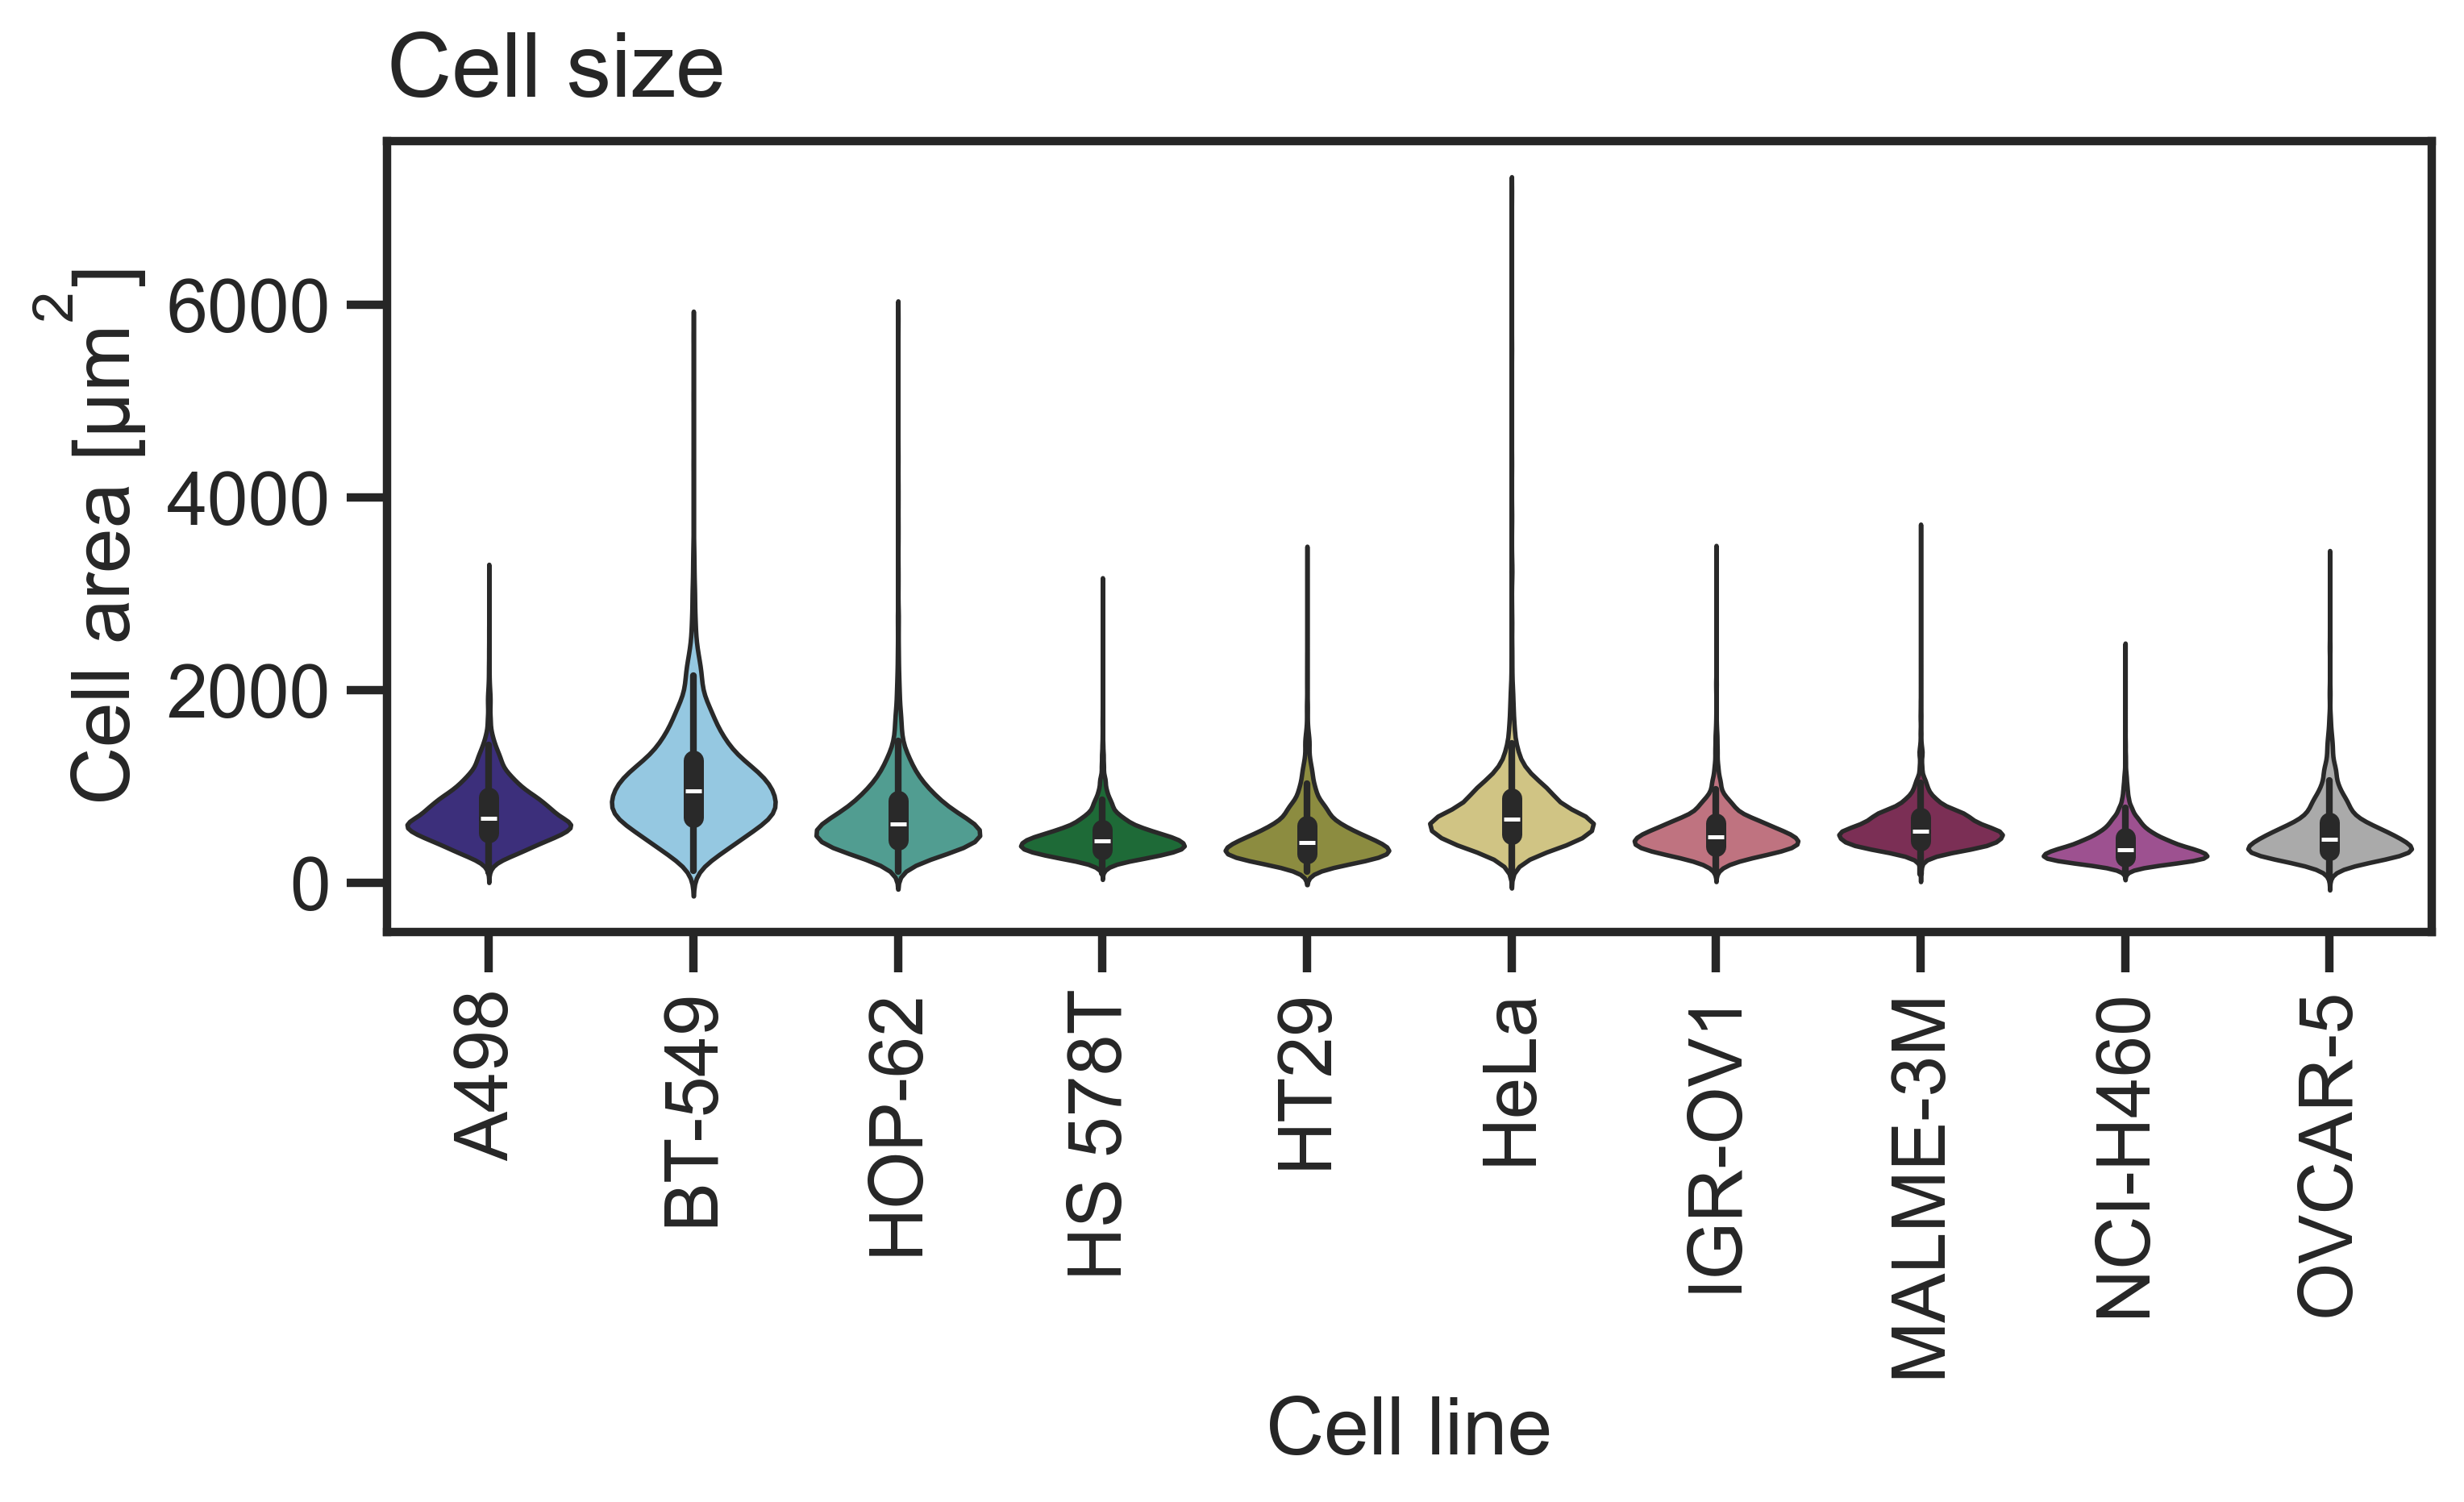

In [6]:
plt.figure(figsize=(8,5))
p = sns.violinplot(x='CellLine', 
                   y='cell_area_um2', 
                   data=adata.obs, 
                   hue='CellLine',
                   palette=palette, 
                   legend=False,
                   linewidth=1)

plt.ylabel(r'Cell area [$\mathregular{\mu m^2}$]')
plt.xlabel('')
plt.xlabel("Cell line")
plt.xticks(rotation=90)
plt.title("Cell size", size=20, x=0, ha="left", va="bottom")
plt.tight_layout()

plt.savefig(plots_path / 'panel_B.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B.svg', bbox_inches='tight')

## Panel C
Venn diagram created using Inkscape with the column 'detection' in the 'SC2_metabolite_IDs.csv' file

## Panel D

### Set paths

In [7]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_3'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [8]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [9]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, random_state=12345)
sc.tl.umap(adata, random_state=12345) 
adata.obs[['UMAP1', 'UMAP2']] = adata.obsm['X_umap']

/Users/jeanydelafiori/Apps/miniconda3/envs/spacem_analysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### UMAP

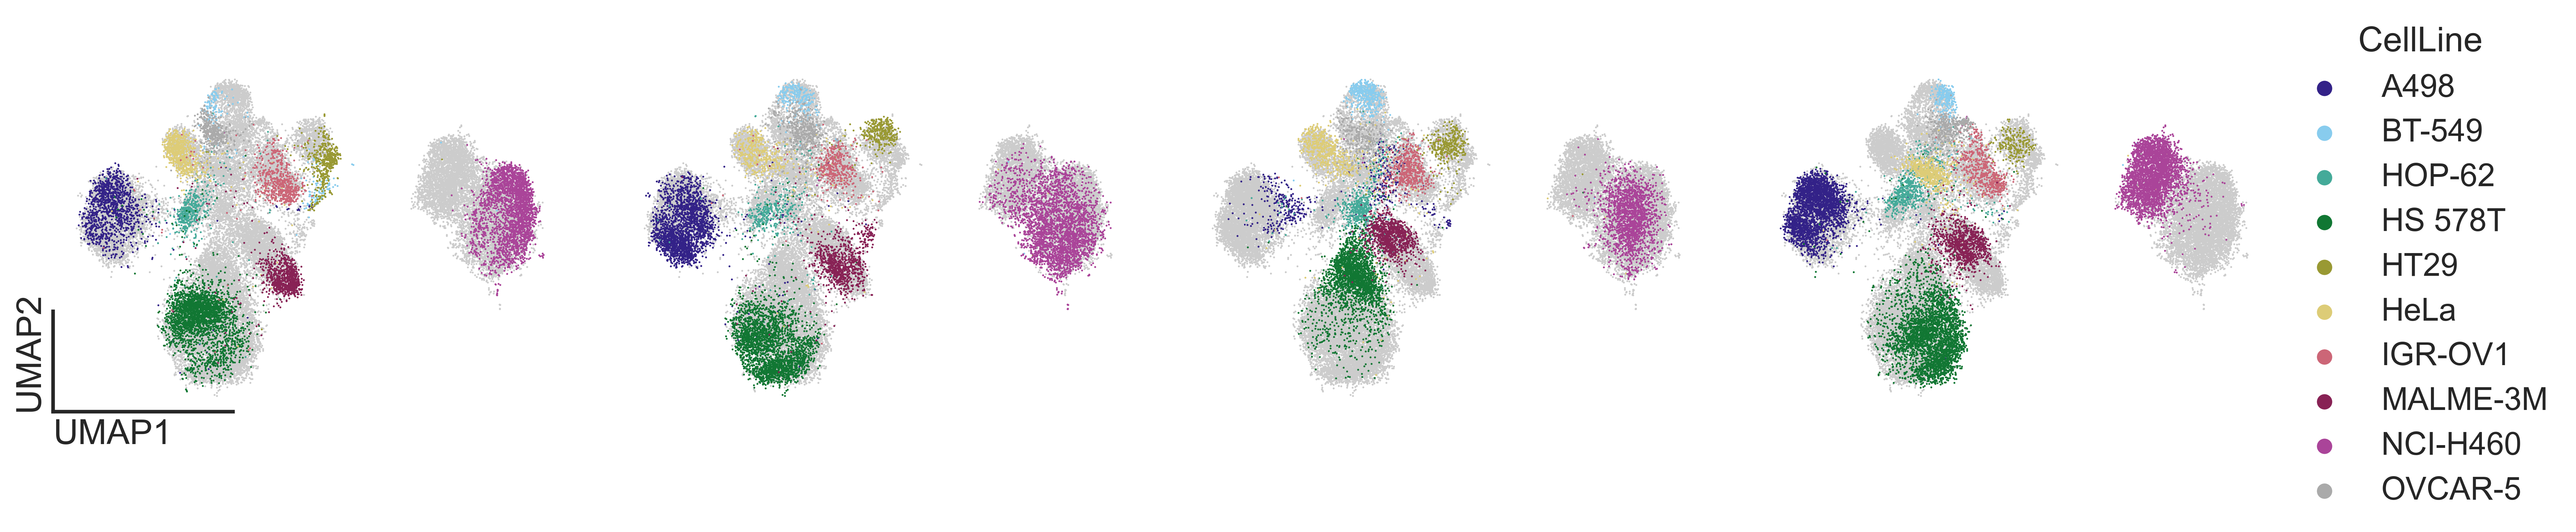

In [10]:
f = pl.highlight_scatterplot(
    data=adata,
    obsm_key='X_umap',
    hue='CellLine', 
    palette=palette,
    col='replicate',
    height=4,
    aspect=1.1,
    decorate_titles=False,
    trim_axes=True,
    scatter_kwargs={'s':1})

f.add_legend(markerscale=8)
f.set_titles(col_template='')

plt.savefig(plots_path / 'panel_D.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_D.svg', bbox_inches='tight')

## Panel E

### Set path

In [11]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_3'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [12]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [13]:
cell_name='HOP-62'

adata = adata[adata.obs.CellLine.eq(cell_name),:]
int_matrix = pd.DataFrame(columns=adata.var_names, data=adata.X, index=adata.obs_names)

### Scatterplots
#### Co-detected

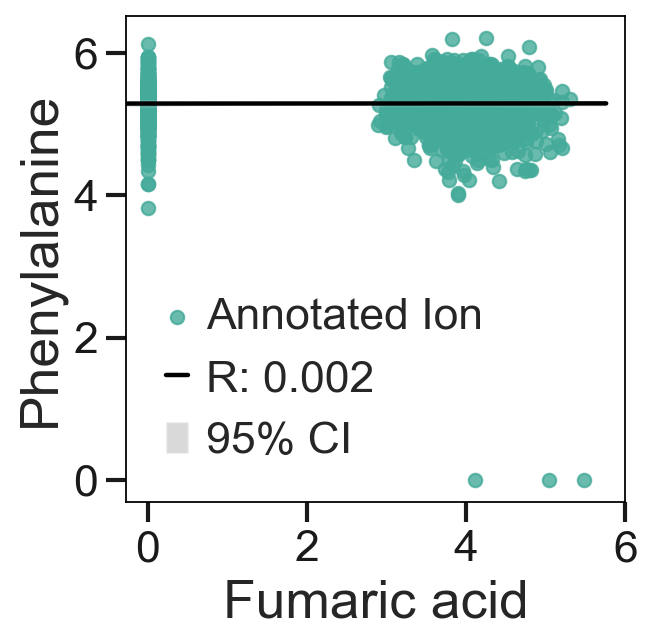

In [14]:
res = stats.pearsonr(int_matrix['C4H4O4-H'], 
                     int_matrix['C9H11NO2-H'],
                     alternative='two-sided')

sc.set_figure_params(fontsize=15)

ax = sns.regplot(data=int_matrix, 
                 x='C4H4O4-H',
                 y='C9H11NO2-H',
                 fit_reg=True,
                 ci=95,
                 line_kws={'lw':'2', 'color':'black'},
                 scatter=True,
                 color=palette[2],
                 truncate=False)

ax.grid(False)
ax.minorticks_off()
ax.legend(labels=['Annotated Ion', f'R: {res.statistic:.3f}', '95% CI'], loc='best', fontsize=20)
plt.xlabel(xlabel=u'Fumaric acid', fontsize=24)
plt.ylabel(ylabel=u'Phenylalanine', fontsize=24)
ax.set_xticks((0,2,4,6))
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig(plots_path / 'panel_E_codetected.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_E_codetected.svg', bbox_inches='tight')

#### Positively co-abundant

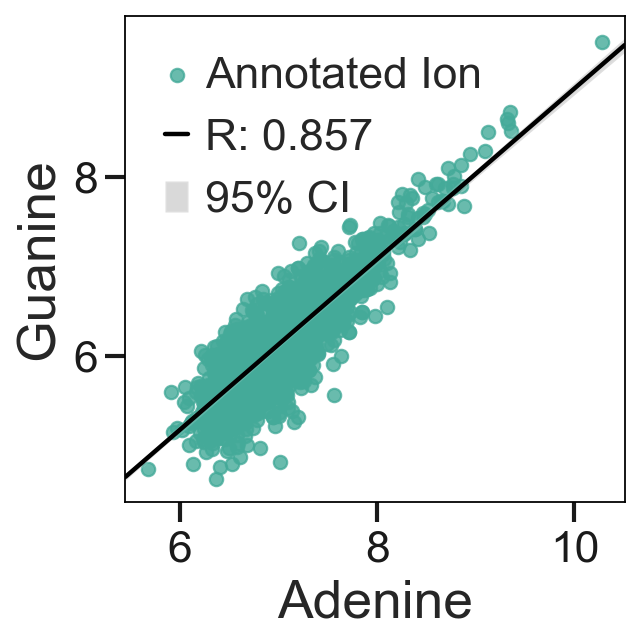

In [15]:
res = stats.pearsonr(int_matrix['C5H5N5-H'], 
                     int_matrix['C5H5N5O-H'], 
                     alternative='two-sided')

sc.set_figure_params(fontsize=15)
ax = sns.regplot(data=int_matrix, 
                 x='C5H5N5-H',
                 y='C5H5N5O-H',
                 fit_reg=True,
                 ci=95,
                 line_kws={'lw':'2', 'color':'black'},
                 scatter=True,
                 color=palette[2],
                 truncate=False)

ax.grid(False)
ax.minorticks_off()
ax.legend(labels=['Annotated Ion', f'R: {res.statistic:.3f}', '95% CI'], loc='best', fontsize=20)
plt.xlabel(xlabel=u'Adenine', fontsize=24)
plt.ylabel(ylabel=u'Guanine', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig(plots_path / 'panel_E_positively.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_E_positively.svg', bbox_inches='tight')

#### Inversely co-abundant

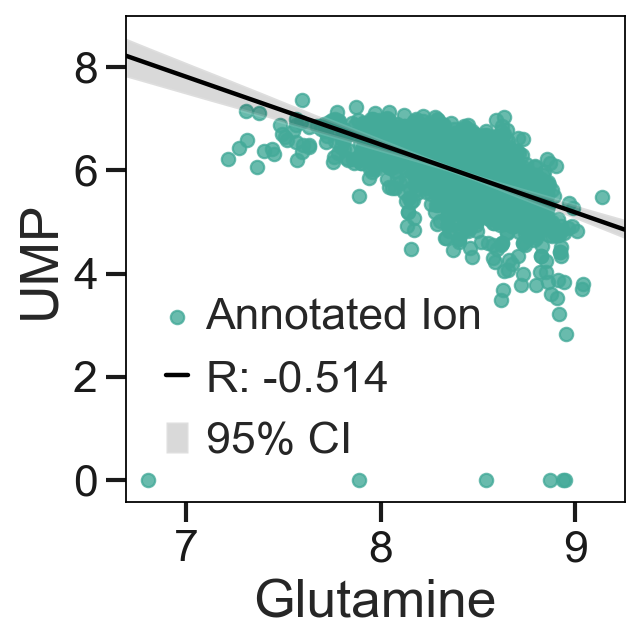

In [16]:
res = stats.pearsonr(int_matrix['C5H10N2O3-H'], 
                     int_matrix['C9H13N2O9P-H'], 
                     alternative='two-sided')

sc.set_figure_params(fontsize=15)
ax = sns.regplot(data=int_matrix, 
                 x='C5H10N2O3-H',
                 y='C9H13N2O9P-H',
                 fit_reg=True,
                 ci=95,
                 line_kws={'lw':'2', 'color':'black'},
                 scatter=True,
                 color= palette[2],
                 truncate=False)

ax.grid(False)
ax.minorticks_off()
ax.legend(labels=['Annotated Ion', f'R: {res.statistic:.3f}', '95% CI'], loc='best', fontsize=20)
plt.xlabel(xlabel=u'Glutamine', fontsize=24)
plt.ylabel(ylabel=u'UMP', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig(plots_path / 'panel_E_inversely.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_E_inversely.svg', bbox_inches='tight')